In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/asthma_k_prototypes.csv', low_memory=False)

In [4]:
df.head(5)

Unnamed: 0      X  \
0           1  A_348   
1           2  A_544   
2           3  A_018   
3           4  A_613   
4           5  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                           31.18149                                                         
1                                           34.76391                                                         
2                                           39.94501                                                         
3                                           62.48423                                                         
4                                           55.44628                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           48.37097                                                          
1                                           16.68085                                                          
2                                           30.08735                                                          
3                                           46.39963                                                          
4                                           14.72002                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                         2691.93414                                                           
1                                         3978.67078                                                           
2                                         5106.73161                                                           
3                                         5296.19633                                                           
4                                         4746.41315                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                        92306.37372                                                           
1                                       119317.89285                                                           
2                                       104613.46857                                                           
3                                       144767.83311                                                           
4                                       102499.23499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                         3729.08658                                                                
1                                         6518.33549                                                                
2                                         5682.34943                                                                
3                                         5468.37355                                                                
4                                         7550.37893                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          214.70864                                                           
1                                          370.93104                                                           
2                                          102.84818                                                           
3                                

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 527 entries, Unnamed: 0 to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(351), int64(27), object(149)
memory usage: 2.5+ MB


In [6]:
dataTypeSeries = df.dtypes

In [7]:
dataTypeSeries

Unnamed: 0                                                                                                      int64
X                                                                                                              object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.       float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.      float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.     float64
                                                                                                               ...   
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigarettes.                      int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigars.                          int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.S

In [8]:
#Load libraries
from sklearn.preprocessing import PowerTransformer
import numpy as np
from kmodes.kprototypes import KPrototypes
#Load libraries
from matplotlib import style
from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/apps/jupyterhub/2019-04-29/miniconda

In [9]:
#Drop Unnamed: 0 variable
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [48]:
#Check which variables are integer ones
list(df.select_dtypes(['int64']).columns)

['X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Vital.Signs.Screening.Diastolic.Blood.Pressure.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Vital.Signs.Screening.Heart.Rate.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Vital.Signs.Screening.Systolic.Blood.Pressure.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Age.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Sample.Identifiers.Baseline.visit.kitID.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Body.Measurements.Height..cm..',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Visit.Information.Baseline.Visit.Days.Since.Screening..Baseline.Day.1..',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other1.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other2.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other3.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other4.',
 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clini

In [10]:
#If you want to print all columns & rows and not a subset of it only.
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
df.head()

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                           31.18149                                                         
1                                           34.76391                                                         
2                                           39.94501                                                         
3                                           62.48423                                                         
4                                           55.44628                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           48.37097                                                          
1                                           16.68085                                                          
2                                           30.08735                                                          
3                                           46.39963                                                          
4                                           14.72002                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                         2691.93414                                                           
1                                         3978.67078                                                           
2                                         5106.73161                                                           
3                                         5296.19633                                                           
4                                         4746.41315                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                        92306.37372                                                           
1                                       119317.89285                                                           
2                                       104613.46857                                                           
3                                       144767.83311                                                           
4                                       102499.23499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                         3729.08658                                                                
1                                         6518.33549                                                                
2                                         5682.34943                                                                
3                                         5468.37355                                                                
4                                         7550.37893                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          214.70864                                                           
1                                          370.93104                                                           
2                                          102.84818                                                           
3                                          341.42903                                                         

In [50]:
#Check variable types for specific columns using:
df.iloc[:,260:494].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Age..years..                  float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Visit.Information.Baseline.Visit.Days.Since.Screening..Baseline.Day.1..                      int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Visit.Information.Baseline.Visit.Days.Since.Screening..Baseline.Day.2..                    float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.                                                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.                                                   object
                                                                                                                               ...   
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.2.         float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.A

In [51]:
df.iloc[:,409:493].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Supplemental.Oxygen.                                        object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Visited.a.ER.at.any.time.because.of.breathing.problems.     object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other1.                                                    int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other2.                                                    int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other3.                                                    int64
                                                                                                                                   ...   
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.1.             float64
X.UBIOPRED.Adult_Cohort_.Jan_2019.

In [52]:
#Convert range of variables 411 - 493 to object as they are recorded as float but are in fact ordinal (categorical) variables
df.iloc[:,411:493]=df.iloc[:,411:493].astype(object)

In [53]:
#Check variable types for specific columns using:
df.iloc[:,409:494].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Supplemental.Oxygen.                                        object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Visited.a.ER.at.any.time.because.of.breathing.problems.     object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other1.                                                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other2.                                                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other3.                                                   object
                                                                                                                                   ...   
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.2.              object
X.UBIOPRED.Adult_Cohort_.Jan_2019.

In [54]:
#Check variable types for specific columns using:
df.iloc[:,409:526].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Supplemental.Oxygen.                                        object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Visited.a.ER.at.any.time.because.of.breathing.problems.     object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other1.                                                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other2.                                                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other3.                                                   object
                                                                                                                                   ...   
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigarettes.                                          int64
X.UBIOPRED.Adult_Cohort_.Jan_2019.

In [55]:
#Convert range of variables 494 - 525 to object as they are recorded as float but are in fact ordinal (categorical) variables
df.iloc[:,495:526]=df.iloc[:,495:526].astype(object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 526 entries, X to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(257), int64(7), object(262)
memory usage: 2.5+ MB


In [57]:
#Check variable type
df.iloc[:,490:527].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.3.          object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.4.          object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.5.          object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Total..Imputed..    float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.10.                  float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.11.                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.12.                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Ou

In [58]:
#Convert 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.10.' to object instead of float
df['X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.10.'] = df[['X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.10.']].astype(object)

In [59]:
#Median imputation of very last float variable with NAs
df['X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Total..Imputed..'].fillna((df['X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Total..Imputed..'].median()), inplace=True)

In [60]:
#Check successful implementation
print (df['X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Total..Imputed..'].isnull().sum())

0


In [61]:
#Check variable types for specific columns using:
df.iloc[:,263:526].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.                                  object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.                                  object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Historic.Test.                                            object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Aspirin.                             object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Barns.                               object
                                                                                                               ...  
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigarettes.                    object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigars.                        object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.H

In [62]:
df.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                           31.18149                                                         
1                                           34.76391                                                         
2                                           39.94501                                                         
3                                           62.48423                                                         
4                                           55.44628                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           48.37097                                                          
1                                           16.68085                                                          
2                                           30.08735                                                          
3                                           46.39963                                                          
4                                           14.72002                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                         2691.93414                                                           
1                                         3978.67078                                                           
2                                         5106.73161                                                           
3                                         5296.19633                                                           
4                                         4746.41315                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                        92306.37372                                                           
1                                       119317.89285                                                           
2                                       104613.46857                                                           
3                                       144767.83311                                                           
4                                       102499.23499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                         3729.08658                                                                
1                                         6518.33549                                                                
2                                         5682.34943                                                                
3                                         5468.37355                                                                
4                                         7550.37893                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          214.70864                                                           
1                                          370.93104                                                           
2                                          102.84818                                                           
3                                          341.42903                                                         

In [63]:
# Convert all the columns in float to integer for correlation plot as float is not handled
for y in df.columns:
    if(df[y].dtype == np.float64):
        df[y] = df[y].astype(int)

In [64]:
df.dtypes

X                                                                                                             object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.        int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.       int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.      int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.      int64
                                                                                                               ...  
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigarettes.                    object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigars.                        object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.H

In [65]:
df.iloc[:,524:526].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.Breathing.Problems.Uncertain.    object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.    object
dtype: object

In [66]:
#Make a copy of df before running code to find correlated variables
#Call it df_correlation_2
df_correlation_2 = df.copy()

In [67]:
df_correlation_2.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                         

In [68]:
#Ignore X as it is Patient ID
df_correlation=df.iloc[:,1:526]
df_correlation.dtypes


X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.            int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.           int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.          int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.          int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.     int64
                                                                                                                   ...  
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigarettes.                        object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigars.                            object
X.UBIOPRED.Adult_Cohort_.Jan_201

In [69]:
#Check null values in df
df_correlation.isnull().sum()

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.             0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.            0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.           0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.           0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.      0
                                                                                                                 ... 
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigarettes.                          0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigars.                              0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.S

In [70]:
#Check your dataset after preprocessing
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 525 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum. to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: int64(263), object(262)
memory usage: 2.5+ MB


In [71]:
#Check its first 5 rows
df_correlation.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                           
4                                                334              

In [30]:
#Compute correlations between variables in dataset
#Use associations from dython.nominal if you want to see heatmap - difficult to visualize with too many variables
#Instead we use compute_associations which is equivalent to associations, however it skips the drawing of the heatmap.
#Correlation between continuous - continuous variables is calculated using Pearsons'R
#Correlation between continuous - categorical variables is calculated using correlation ratio
#Correlation between categorical - categorical variables is calculated using Cramer's V.
#We imputed continuous variables previously, however categorical variables have NAs. NAs were replaced to belong to NANs group, therefore we are not dropping them when calcuating strength of assocaitions between variables.
#Set clustering to True (default is False), also computed associations are sorted into groups by similar correlations
from dython.nominal import associations
from dython.nominal import compute_associations
assoc = compute_associations(df_correlation,nominal_columns='auto',clustering=True)

KeyboardInterrupt: 

In [ ]:
assoc.info()

In [33]:
#Set to NANs auto-correlated pairs and correlated pairs that are not so strongly associated (<0.8) in assoc. Call this new df assoc2
assoc2 = assoc[(assoc.iloc[:,:]>= 0.80) & (assoc.iloc[:,:] != 1.0)]

In [34]:
assoc2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.PEF... to X.UBIOPRED.Adult_Cohort_.Jan_2019..Site.Codes.Site.Code.
Columns: 525 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.PEF... to X.UBIOPRED.Adult_Cohort_.Jan_2019..Site.Codes.Site.Code.
dtypes: float64(525)
memory usage: 2.1+ MB


In [35]:
assoc2.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.PEF...  \
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                           
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                           
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                           
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                           
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                           

                                                    X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC....L..  \
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                               
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                               
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                               
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                               
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                           0.824133                                               

                                                    X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Predicted..L..  \
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                        
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                        
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                        
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                        
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                        

                                                    X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Actual..L..  \
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                     
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                     
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                     
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                     
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                     

                                                    X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1....L..  \
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                                NaN                                                
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...                                           0.824133     

In [37]:
#Save assoc and assoc2 matrices for potential future use
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes/Mid_point")
assoc.to_csv('assoc.csv')
assoc2.to_csv('assoc2.csv')

In [38]:
#Convert assoc matrix into a one-dimensional series of values.
corr_pairs = assoc2.unstack()
#print(corr_pairs) - Not enough memory to run this

In [39]:
#Sort the correlated pairs
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#print(sorted_pairs)

In [40]:
#Select negative correlation pairs
negative_pairs = sorted_pairs[sorted_pairs < 0]

#print(negative_pairs)

In [41]:
#Select strong correlation pairs (negative and positive)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.80]

#strong_pairs

In [42]:
#Transform list of most strongly correlated pairs into a df
high_corr = pd.DataFrame(strong_pairs)

In [43]:
high_corr.head(5)

0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...  0.800267
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...  0.800267
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...  0.800624
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...  0.800624
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...  0.800635

In [44]:
high_corr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 542 entries, ('X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.23.', 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.17.') to ('X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Clusters.Classification.by.eosinophil.count.cohort.eosinophil.', 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Study.Groups.cohort.')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       542 non-null    float64
dtypes: float64(1)
memory usage: 14.6+ KB


In [45]:
#Rename column 0 with correlation coefficient
high_corr.columns = ['correlation']

In [46]:
high_corr.head(5)

correlation
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800267
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800267
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800624
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800624
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800635

In [47]:
#Remove duplicates
high_corr.drop_duplicates(subset=['correlation'])

correlation
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800267
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800624
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.800635
X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Hist... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Sc...     0.801297
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.802679
...                                                                                                            ...
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.984885
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat... X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Dat...     0.985549
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnair...     0.986930
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Sc... X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Ba...     0.988470
X.UBIOPRED.Adult_Cohort_.Jan_2019..Study.Groups... X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Clus...     0.999188

[266 rows x 1 columns]

In [72]:
#If you want to drop some variables that are very correlated with each other (the ones on the left)
df_correlation = df_correlation.drop(['X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.23.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.28.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Parental.Hay.Fever.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.20.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Site.Codes.Site.Code.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.17.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Asparagine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.14.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.23.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.24.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.10.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.25.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Environmental.9.17.23.26..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Ethnic.origin.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Physical.Activity.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Predicted..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.10.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.12.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Activity.limitation..1.2.3.4.5.11.19.25.28.31.32..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.14.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Environmental.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Sibling.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.3.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.24.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Diabetes.Mother.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Symptoms.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.15.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Race.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.25.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Body.Measurements.Abdominal.Girth..cm..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Informed.Consent.Informed.Consent.Ct.Scans.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.21.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Environmental.9.17.23.26..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.20.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.3.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.15.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Environmental.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.5.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Drugomics.Baseline.Visit.Urine.Karolinska.Drug.Levels.Dehydroepiandrosterone.glucuronide..ng.mL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.20.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Clusters.Classification.by.eosinophil.count.eosinophils..per.uL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.22.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.22.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.15.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Body.Measurements.Abdominal.Girth..cm..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Eczema.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Drugomics.Baseline.Visit.Urine.Karolinska.Drug.Levels.Androsterone.glucuronide..ng.mL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Body.Measurements.Weight..kg..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.14.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.1.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Emotional.7.13.15.21.27..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Drugomics.Baseline.Visit.Urine.Karolinska.Drug.Levels.Epitestosterone.sulfate..ng.mL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Plethysmography.Baseline.Total.lung.capacity..TLC..Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC.Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.1.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.5.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Mother.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Medical.or.Surgical.History.Nasal.Polyp.Surgery.Diagnosed.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Exacerbations.Recent.Asthma.Exacerbation.History.Baseline.Severe.Exacerbation.Per.Year.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.19.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Haematology.and.biochemistry.tests.Screening.Eosinophils...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Absolute.Change.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Ethnic.origin.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Activity.limitation..1.2.3.4.5.11.19.25.28.31.32..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.1.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ5..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Haematology.and.biochemistry.tests.Screening.neutrophils..x10.3.uL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.5.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Diabetes.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Activity.limitation..1.2.3.4.5.11.19.25.28.31.32..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.3.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Clusters.Classification.by.eosinophil.count.eosinophil.tertiles.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Plethysmography.Baseline.Total.lung.capacity..TLC..Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ6..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.28.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ7..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Symptoms.6.8.10.12.14.16.18.20.22.24.29.30..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ7.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Hospital.Anxiety.and.Depression.Scale..HADS..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Hospital.Anxiety.and.Depression.Scale..HADS..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Symptoms.6.8.10.12.14.16.18.20.22.24.29.30..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ6.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Phosphoethanolamine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ5..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ6..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Informed.Consent.Consent.Samples.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Atopy.Combined.Atopy.Result.Common.Aeroallergens.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ6..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.2.Deoxyinosine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Prolylhydroxyproline.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC.Actual.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Site.Codes.Site.Code.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ5..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ5.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Electrocardiogram.Screening.Ecg.Not.Done.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ6.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ7..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ5.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ6.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Symptoms.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Baseline.Day.1.Cotinine.Was.Present.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Status.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Emotional.7.13.15.21.27..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Octopamine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Environmental.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Exhaled.nitric.oxide..NO..Baseline.NO.Not.Done.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ5.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Informed.Consent.Informed.Consent.Ct.Scans.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Study.Groups.cohort.'], axis=1)

In [73]:
#If you want to drop some variables that are very correlated with each other (the ones on the left)
df_correlation_2 = df_correlation_2.drop(['X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.23.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.28.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Parental.Hay.Fever.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.20.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Site.Codes.Site.Code.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.17.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Asparagine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.14.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.23.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.24.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.10.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.25.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Environmental.9.17.23.26..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Ethnic.origin.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Physical.Activity.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Predicted..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.10.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.12.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Activity.limitation..1.2.3.4.5.11.19.25.28.31.32..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.14.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Environmental.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Sibling.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.3.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.24.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Diabetes.Mother.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Symptoms.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.15.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Race.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.25.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Body.Measurements.Abdominal.Girth..cm..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Informed.Consent.Informed.Consent.Ct.Scans.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.21.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Environmental.9.17.23.26..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.20.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.3.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.15.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Environmental.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.5.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.13.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Drugomics.Baseline.Visit.Urine.Karolinska.Drug.Levels.Dehydroepiandrosterone.glucuronide..ng.mL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.20.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Clusters.Classification.by.eosinophil.count.eosinophils..per.uL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.22.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.22.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.SinoNasal.Outcomes.Test..SNOT..Baseline.Visit.Question.15.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Body.Measurements.Abdominal.Girth..cm..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Eczema.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Drugomics.Baseline.Visit.Urine.Karolinska.Drug.Levels.Androsterone.glucuronide..ng.mL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Body.Measurements.Weight..kg..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.31.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.14.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.1.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.8.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Emotional.7.13.15.21.27..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.7.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Drugomics.Baseline.Visit.Urine.Karolinska.Drug.Levels.Epitestosterone.sulfate..ng.mL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.18.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.27.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.30.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Plethysmography.Baseline.Total.lung.capacity..TLC..Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.2.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC.Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.1.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.5.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Mother.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Medical.or.Surgical.History.Nasal.Polyp.Surgery.Diagnosed.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Exacerbations.Recent.Asthma.Exacerbation.History.Baseline.Severe.Exacerbation.Per.Year.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.19.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1.Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.6.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Haematology.and.biochemistry.tests.Screening.Eosinophils...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Absolute.Change.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Ethnic.origin.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Cystic.Fibrosis.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Activity.limitation..1.2.3.4.5.11.19.25.28.31.32..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.1.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ5..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Haematology.and.biochemistry.tests.Screening.neutrophils..x10.3.uL..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.4.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.5.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Family.History.Diabetes.Father.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Activity.limitation..1.2.3.4.5.11.19.25.28.31.32..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Medication.Adherence.Rating.Scale..MARS..Baseline.Visit.Question.3.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Clusters.Classification.by.eosinophil.count.eosinophil.tertiles.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Plethysmography.Baseline.Total.lung.capacity..TLC..Predicted..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ6..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.28.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ7..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Symptoms.6.8.10.12.14.16.18.20.22.24.29.30..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75.Actual..L.sec..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ7.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Ratio...'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Hospital.Anxiety.and.Depression.Scale..HADS..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Actual..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Hospital.Anxiety.and.Depression.Scale..HADS..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Pre.Salbutamol..L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Symptoms.6.8.10.12.14.16.18.20.22.24.29.30..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ6.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Phosphoethanolamine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ5..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ6..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEF.25.75....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Post.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.32.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Post.Salbutamol.Pct.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Informed.Consent.Consent.Samples.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Question.29.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Atopy.Combined.Atopy.Result.Common.Aeroallergens.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ6..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.2.Deoxyinosine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FVC.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Prolylhydroxyproline.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FVC.Actual.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Site.Codes.Site.Code.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ5..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEF.25.75.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ5.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Electrocardiogram.Screening.Ecg.Not.Done.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ6.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.Average..ACQ1.ACQ7..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ5.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.Pre.Salbutamol....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Spirometry.Baseline.FEV1....L..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ6.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Symptoms.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Baseline.Day.1.Cotinine.Was.Present.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Activity.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Status.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Average..Emotional.7.13.15.21.27..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Metabolomics.Baseline.Visit.Urine.Octopamine.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Post.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Reversibility.Baseline.FEV1.FVC.Pre.Salbutamol.Actual.Ratio.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Quality.of.Life.Questionnaire..AQLQ..Baseline.Visit.Environmental.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Exhaled.nitric.oxide..NO..Baseline.NO.Not.Done.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questionnaires.Asthma.Control.Questionnaire..ACQ..Baseline.Visit.ACQ5.Total..Imputed..'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Informed.Consent.Informed.Consent.Ct.Scans.'
,'X.UBIOPRED.Adult_Cohort_.Jan_2019..Study.Groups.cohort.'], axis=1)

In [74]:
df_correlation_2.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                         

In [75]:
#df_correlation is the same as df_correlation_2 but without patient ID
df_correlation.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                           
4                                                334              

In [76]:
#Check that variables have successfully been dropped from df. 
df_correlation.info()
#Save this new dataframe without patient ID
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
df_correlation.to_csv("df_to_be_clustered_08+.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 411 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum. to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: int64(205), object(206)
memory usage: 1.9+ MB


In [79]:
#Check that variables have successfully been dropped from df. 
df_correlation_2.info()
#Save this new dataframe with patient ID
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
df_correlation_2.to_csv("df_to_be_clustered_08+_with_ID.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 412 entries, X to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: int64(205), object(207)
memory usage: 1.9+ MB


In [49]:
#Set index aside (Patient ID) as we don't want to include it in K-prototypes (done already)
ID = df['X'].to_list()
ID= np.asarray(ID)
len(ID)

620

HOPKIN STATS

In [77]:
#Hopkin stats to test the spatial randomness of the data and indicates the cluster tendency (how well the data can be clustered)
#If the value is around 0.5 or lesser, the data is uniformly distributed and hence it is unlikely to have statistically significant clusters.
#If the value is between 0.7 and 0.99, it has a high tendency to cluster and therefore likely to have statistically significant clusters.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [78]:
#Checking whether data can be clustered
Num_features =df_correlation.select_dtypes(include=[np.number]).columns
hopkins(df_correlation[Num_features])
#0.8248 is a good score on all the numerical variables which means that the data has a high tendency to cluster

0.8283896767503578

In [4]:
df_correlation = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/df_to_be_clustered_08+.csv', low_memory=False)

In [11]:
df_correlation_2 = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/df_to_be_clustered_08+_with_ID.csv', low_memory=False)

In [12]:
df_correlation_2.head(5)

Unnamed: 0      X  \
0           0  A_348   
1           1  A_544   
2           2  A_018   
3           3  A_613   
4           4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                

In [13]:
#Drop Unnamed: 0 variable before running standardization of numerical variables
df_correlation_2 = df_correlation_2.drop(['Unnamed: 0'],axis=1)

In [21]:
df_correlation_2.dtypes

X                                                                                                                                                                          object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.                                                                     int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.                                                                    int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.                                                                   int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.                                                                   int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.

In [22]:
df_correlation_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 412 entries, X to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(59), int64(223), object(130)
memory usage: 1.9+ MB


In [26]:
df_correlation_2.iloc[:,334:412].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other1.                                                int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other2.                                                int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other3.                                                int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Other4.                                                int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Haematology.and.biochemistry.tests.Screening.Haematology.Not.Done.           float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Lung.Function.Plethysmography.Baseline.Plethysmography.Not.Done.             float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Clinical.Data.Vital.Signs.Baseline.Day.1.Vital.Signs.Not.Done.                               int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Demographic.Data.Occupation

In [27]:
df_correlation_2.iloc[:,334:412]=df_correlation_2.iloc[:,334:412].astype(object)

In [29]:
df_correlation_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 412 entries, X to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: int64(204), object(208)
memory usage: 1.9+ MB


In [85]:
kprot_df_2 = df_correlation_2.copy()
#Pre-processing
for c in df_correlation_2.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_df_2[c] =  pt.fit_transform(np.array(kprot_df_2[c]).reshape(-1, 1))

divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero

In [39]:
#Check null variables in kprot_df_2
pd.options.display.max_columns = None
pd.options.display.max_rows = None
kprot_df_2.isnull().sum()

X                                                                                                                                                                           0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.                                                                     0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.                                                                    0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.                                                                   0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.                                                                   0
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.                    

In [86]:
kprot_df_2.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                          -0.342803                                                         
1                                          -0.185872                                                         
2                                           0.064556                                                         
3                                           1.087608                                                         
4                                           0.794419                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           0.661544                                                          
1                                          -2.475151                                                          
2                                          -0.500135                                                          
3                                           0.566182                                                          
4                                          -2.964420                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                          -0.873296                                                           
1                                          -0.264045                                                           
2                                           0.238829                                                           
3                                           0.321316                                                           
4                                           0.080898                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                          -0.118239                                                           
1                                           0.551317                                                           
2                                           0.196620                                                           
3                                           1.120895                                                           
4                                           0.143794                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                          -1.316411                                                                
1                                           0.401209                                                                
2                                          -0.065821                                                                
3                                          -0.190881                                                                
4                                           0.937631                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          -0.104893                                                           
1                                           1.164455                                                           
2                                          -1.517908                                                           
3                                           0.961596                                                         

In [90]:
#Set X as index before label encoding object variables
kprot_df_2.set_index('X',inplace=True)

In [91]:
kprot_df_2.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
X                                                                                                                
A_348                                          -0.342803                                                         
A_544                                          -0.185872                                                         
A_018                                           0.064556                                                         
A_613                                           1.087608                                                         
A_390                                           0.794419                                                         

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
X                                                                                                                 
A_348                                           0.661544                                                          
A_544                                          -2.475151                                                          
A_018                                          -0.500135                                                          
A_613                                           0.566182                                                          
A_390                                          -2.964420                                                          

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                          -0.873296                                                           
A_544                                          -0.264045                                                           
A_018                                           0.238829                                                           
A_613                                           0.321316                                                           
A_390                                           0.080898                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                          -0.118239                                                           
A_544                                           0.551317                                                           
A_018                                           0.196620                                                           
A_613                                           1.120895                                                           
A_390                                           0.143794                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
X                                                                                                                       
A_348                                          -1.316411                                                                
A_544                                           0.401209                                                                
A_018                                          -0.065821                                                                
A_613                                          -0.190881                                                                
A_390                                           0.

In [92]:
kprot_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, A_348 to A_353
Columns: 411 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum. to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(204), object(207)
memory usage: 1.9+ MB


In [93]:
kprot_df_2.iloc[:,204:411].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.                                                                 object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.                                                                 object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Historic.Test.                                                                           object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Aspirin.                                                            object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Barns.                                                              object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Cold.Air.                                                           object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Dust.                                  

In [34]:
#Save this new dataframe with patient ID and standardization (Yeo-Johnson)
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
kprot_df_2.to_csv("df_to_be_clustered_08+_with_ID_plus_stand.csv")

In [5]:
kprot_df = df_correlation.copy()
#Pre-processing
for c in df_correlation.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_df[c] =  pt.fit_transform(np.array(kprot_df[c]).reshape(-1, 1))

divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero

In [6]:
#Check which variables indexes are categorical
pd.options.display.max_columns = None
pd.options.display.max_rows = None
kprot_df.dtypes

Unnamed: 0                                                                                                                                                                float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.                                                                   float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.                                                                  float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.                                                                 float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.                                                                 float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.

In [7]:
kprot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 412 entries, Unnamed: 0 to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(283), object(129)
memory usage: 1.9+ MB


In [8]:
#Make sure the location you call contain all & only categorical variables in df - NOT OBLIGATORY
test = kprot_df.iloc[:,204:411]
#test

In [9]:
test.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Visit.Information.Baseline.Visit.Days.Since.Screening..Baseline.Day.2..  \
0                                           0.484210                                                            
1                                          -0.061836                                                            
2                                           0.994588                                                            
3                                           1.446248                                                            
4                                          -0.061836                                                            

  X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.  \
0                                                yes                             
1                                                NaN                             
2                                                NaN                             
3                                                 no                             
4                                                 no                             

  X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.  \
0                                                 no                             
1                                                NaN                             
2                                                NaN                             
3                                                 no                             
4                                                 no                             

  X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Historic.Test.  \
0                                                yes                   
1                                                NaN                   
2                                                NaN                   
3                                                yes                   
4                                                 no                   

  X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Aspirin.  \
0                                          uncertain                                  
1                                                 no                                  
2                                                 no                                  
3                                          uncertain                                  
4                                                 no                                  

  X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Barns.  \
0                                                yes                                
1                                                 no                                
2                                                 no                                
3                                          uncertain                                
4                                                yes                                

  X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Cold.Air.  \
0                                                yes                                   
1                                                 no                                   
2                                                 no                                   
3                                                yes                                   
4                                                yes                                   

  X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Dust.  \
0                                                yes                               
1                                                 no                               
2                                                 no                               
3     

In [10]:
#Turn all categorical variables into strings for labelencoder
kprot_df.iloc[:,204:411]=kprot_df.iloc[:,204:411].astype(str)

In [94]:
#Turn all categorical variables into strings for labelencoder
kprot_df_2.iloc[:,204:411]=kprot_df_2.iloc[:,204:411].astype(str)

In [95]:
kprot_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, A_348 to A_353
Columns: 411 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum. to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(204), object(207)
memory usage: 1.9+ MB


In [96]:
kprot_df_2.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
X                                                                                                                
A_348                                          -0.342803                                                         
A_544                                          -0.185872                                                         
A_018                                           0.064556                                                         
A_613                                           1.087608                                                         
A_390                                           0.794419                                                         

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
X                                                                                                                 
A_348                                           0.661544                                                          
A_544                                          -2.475151                                                          
A_018                                          -0.500135                                                          
A_613                                           0.566182                                                          
A_390                                          -2.964420                                                          

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                          -0.873296                                                           
A_544                                          -0.264045                                                           
A_018                                           0.238829                                                           
A_613                                           0.321316                                                           
A_390                                           0.080898                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                          -0.118239                                                           
A_544                                           0.551317                                                           
A_018                                           0.196620                                                           
A_613                                           1.120895                                                           
A_390                                           0.143794                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
X                                                                                                                       
A_348                                          -1.316411                                                                
A_544                                           0.401209                                                                
A_018                                          -0.065821                                                                
A_613                                          -0.190881                                                                
A_390                                           0.

In [97]:
for c in kprot_df_2.select_dtypes(exclude='float64').columns:
    labelencoder1=LabelEncoder()
    kprot_df_2[c] =  labelencoder1.fit_transform(np.array(kprot_df_2[c]).reshape(-1, 1))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [98]:
kprot_df_2.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
X                                                                                                                
A_348                                          -0.342803                                                         
A_544                                          -0.185872                                                         
A_018                                           0.064556                                                         
A_613                                           1.087608                                                         
A_390                                           0.794419                                                         

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
X                                                                                                                 
A_348                                           0.661544                                                          
A_544                                          -2.475151                                                          
A_018                                          -0.500135                                                          
A_613                                           0.566182                                                          
A_390                                          -2.964420                                                          

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                          -0.873296                                                           
A_544                                          -0.264045                                                           
A_018                                           0.238829                                                           
A_613                                           0.321316                                                           
A_390                                           0.080898                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                          -0.118239                                                           
A_544                                           0.551317                                                           
A_018                                           0.196620                                                           
A_613                                           1.120895                                                           
A_390                                           0.143794                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
X                                                                                                                       
A_348                                          -1.316411                                                                
A_544                                           0.401209                                                                
A_018                                          -0.065821                                                                
A_613                                          -0.190881                                                                
A_390                                           0.

In [99]:
#Reset index before saving file
kprot_df_2.reset_index(inplace=True)

In [100]:
kprot_df_2.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                          -0.342803                                                         
1                                          -0.185872                                                         
2                                           0.064556                                                         
3                                           1.087608                                                         
4                                           0.794419                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           0.661544                                                          
1                                          -2.475151                                                          
2                                          -0.500135                                                          
3                                           0.566182                                                          
4                                          -2.964420                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                          -0.873296                                                           
1                                          -0.264045                                                           
2                                           0.238829                                                           
3                                           0.321316                                                           
4                                           0.080898                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                          -0.118239                                                           
1                                           0.551317                                                           
2                                           0.196620                                                           
3                                           1.120895                                                           
4                                           0.143794                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                          -1.316411                                                                
1                                           0.401209                                                                
2                                          -0.065821                                                                
3                                          -0.190881                                                                
4                                           0.937631                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          -0.104893                                                           
1                                           1.164455                                                           
2                                          -1.517908                                                           
3                                           0.961596                                                         

In [102]:
#Save dataset now that it has been standardized (Yeo-Johnson) and labeled.
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
kprot_df_2.to_csv("df_for_proto_after_stand_and_labeled.csv")

In [51]:
#Load library
from sklearn.preprocessing import LabelEncoder

In [65]:
labelencoder1=LabelEncoder()

In [13]:
#Convert kprot_df to a numpy array that we call X_df
X_df = kprot_df.iloc[:,:].values
#Look at shape
X_df.shape

(620, 412)

In [23]:
#Make a copy of kprot_df 
kprot_df2 = kprot_df.copy()

In [24]:
for i in range (205,412):
        X_df[:,i]=labelencoder1.fit_transform(X_df[:,i])
        print (i)

205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411


In [25]:
#If you to turn back your array into a dataframe to better analyze NAN
new_df = pd.DataFrame(X_df)

In [27]:
new_df.head()
#You observe that values are encoded

0          1         2          3         4          5         6  \
0  -2.1565  -0.342803  0.661544  -0.873296 -0.118239   -1.31641 -0.104893   
1 -2.13172  -0.185872  -2.47515  -0.264045  0.551317   0.401209   1.16445   
2 -2.11045  0.0645564 -0.500135   0.238829   0.19662 -0.0658211  -1.51791   
3 -2.09118    1.08761  0.566182   0.321316   1.12089  -0.190881  0.961596   
4 -2.07327   0.794419  -2.96442  0.0808977  0.143794   0.937631   0.91084   

           7         8          9         10        11 12         13  \
0    1.65743   1.36241   0.139224 -0.0346105   2.20815  0  0.0195606   
1    1.65743 -0.542305    0.12294  -0.685494 -0.427698  0  -0.204663   
2  -0.346662 -0.747502 -0.0241573   -0.48122  -1.17041  0  -0.216626   
3  0.0695119    1.8414   -1.45616  -0.364941  0.383501  0  -0.613829   
4    1.65743 -0.487365  -0.540695  -0.999027  0.614199  0   -1.04833   

         14        15        16        17         18        19         20  \
0  0.386541  0.497764  0.318004   1.17271   0.120983   1.06774   0.894868   
1 -0.429325 -0.704478  0.290463  0.484322 -0.0265542  0.414125   0.400075   
2    3.4024 -0.253732 -0.618573  -1.11704  -0.271109 -0.897445    -1.9202   
3  0.379189  0.378126  0.480284   1.00457   0.455893   1.17418  0.0928292   
4  -1.86963 -0.449252  0.206515  0.539303   0.239393  0.430809    1.12585   

          21        22        23        24         25         26        27  \
0   -2.25474   1.13034   1.02159  0.912724   0.590104   0.808443  0.984769   
1   0.292148 -0.782185 -0.559977 -0.301277  0.0627325  0.0655332 -0.564396   
2  -0.866183 -0.782185  -1.83569 -0.770291   -1.48084   -1.08504 -0.564396   
3  0.0850213   1.74851   2.60863   1.54699   0.590104    1.66231  0.984769   
4  -0.470132   1.13034  0.176036  0.409989    0.25375   0.155087  0.984769   

         28        29        30         31         32         33        34  \
0   1.04832   1.69952  0.904766    0.70861     1.2958  0.0378242 -0.484569   
1  0.601069 -0.579673 -0.313181   -1.16989     1.2688    0.31535  0.741944   
2 -0.533716 -0.579673   0.18156 -0.0825979   -1.37655    1.05993 -0.740569   
3  0.842148 -0.579673 -0.224474    0.70861  0.0100693    -0.0228  -1.83614   
4  0.675846 -0.579673  0.256082   -1.16989   0.569445   0.409579 -0.338215   

         35         36        37         38        39        40        41  \
0  -1.36647  -0.758742  -1.40082 -0.0849482   1.63847  -0.81526 -0.156962   
1  -1.36647   0.143951  0.251894  -0.267109 -0.604555  0.601285 -0.447786   
2  -1.36647   -1.95883  -1.65299   0.381978 -0.604555 -0.619038  0.250722   
3  0.553131  0.0118737 -0.190485 -0.0849482 -0.604555  0.273678  0.184964   
4  0.553131 -0.0815864  0.251894   0.238043 -0.604555  -1.27186  0.184964   

          42        43         44        45        46        47        48 49  \
0   -1.32629   1.76355    1.20885   1.87058   -1.9005 -0.719238  -1.24847  0   
1    0.37266 -0.524101  -0.489998 -0.199335  0.570434 -0.123484  0.629634  0   
2   -0.94758 -0.524101   0.152145 -0.199335  0.228876   1.19211  0.629634  0   
3  0.0895746 -0.524101 -0.0611258  0.232936 -0.124502  0.463991  0.629634  0   
4   0.784882   1.76355  -0.489998  0.654837  0.570434 -0.139968  -1.24847  0   

         50        51         52         53        54        55        56  \
0   0.17744 -0.915333  -0.383601 -0.0401934 -0.167906  0.719739 -0.209215   
1 -0.239338 -0.915333   0.778148 -0.0401934 -0.167906  0.719739 -0.209215   
2  0.518625  0.710329   0.431987 -0.0401934 -0.167906  0.719739 -0.209215   
3 -0.019646 -0.915333  0.0479838 -0.0401934 -0.167906 -0.606219 -0.209215   
4   1.55128 -0.915333  -0.383601 -0.0401934 -0.167906 -0.606219 -0.209215   

         57         58        59        60        61         62         63  \
0    2.4107    1.09574 -0.814939  -1.58989  0.118244  -0.932432  -0.591349   
1 -0.984492  -0.895892 -0.207259  -1.22141 -0.613197  0.0267487   -0.41601   
2 -0.984492   -1.38716  -1.61482  0.482444  -1.40394    -2.0652  -0.472

In [28]:
new_df.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
40     object
41     object
42     object
43     object
44     object
45     object
46     object
47     object
48     object
49     object
50     object
51     object
52     object
53     object
54     object
55     object
56     object
57     object
58     object
59     object
60     object
61     object
62     object
63     object
64     object
65     object
66     object
67     object
68     object
69     object
70     object
71    

In [29]:
new_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [50]:
#Save this new dataframe
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
new_df.to_csv("df_imp_plus_stand")

In [70]:
#Determine if the data has a good tendency to cluster
hopkins(new_df)

NameError: name 'hopkins' is not defined

In [30]:
categorical_columns = [204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,
239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,
280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,
321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,
362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,
404,405,406,407,408,409,410]

PERFORMANCE DETERMINE WHAT IS BEST K

In [21]:
#OPTIONAL: Elbow plot with cost (will take a LONG time)
from tqdm import tqdm
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 15)):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(X_df, categorical=categorical_columns)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

100%|██████████| 13/13 [00:00<00:00, 160.60it/s]

Can't cluster with 2 clusters
Can't cluster with 3 clusters
Can't cluster with 4 clusters
Can't cluster with 5 clusters
Can't cluster with 6 clusters
Can't cluster with 7 clusters
Can't cluster with 8 clusters
Can't cluster with 9 clusters
Can't cluster with 10 clusters
Can't cluster with 11 clusters
Can't cluster with 12 clusters
Can't cluster with 13 clusters
Can't cluster with 14 clusters


In [73]:
from plotly.offline import plot
import plotly.offline
import plotly.graph_objs as go

os.chdir("/rds/general/user/md2620/home/asthma/Malo/")
plotly.offline.plot({"data": [go.Scatter(x=n_clusters, y=costs)],
                     "layout": go.Layout(title="Finding optimal number of clusters using Cao method")},
                     image='jpeg', image_filename='opt_k_clustering')

'temp-plot.html'

In [31]:
#From elbow plot, optimal number of K is 9
#Re-run kprototypes with K=10
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

kproto_df = KPrototypes(n_clusters= 9, init='Cao', n_jobs = 4)
clusters = kproto_df.fit_predict(X_df, categorical=categorical_columns)

# Print cluster centroids of the trained model.
print(kproto_df.cluster_centroids_)

# Print training statistics
print(kproto_df.cost_)
print(kproto_df.n_iter_)


[['0.14715816379523175' '0.02406703323569011' '0.05127207257236253' ...
  '0' '0' '0']
 ['-0.6794424971980371' '0.1502972045884306' '0.2042763082703993' ... '0'
  '0' '2']
 ['0.6880913634120372' '0.2107404275877469' '-0.30948267615839453' ...
  '0' '0' '2']
 ...
 ['-0.3928574645023529' '0.30752877986547683' '-0.18940935747817145' ...
  '0' '0' '2']
 ['-0.23445520447476534' '0.4238063181568496' '0.20071584165357334' ...
  '0' '0' '2']
 ['0.02448061664622638' '-0.18457970007776742' '-0.18968276307780857' ...
  '0' '0' '0']]
232713.70467468788
14


In [32]:
#Print count of each cluster
print(pd.Series(clusters).value_counts())

0    192
8    172
5    134
1     39
4     25
3     22
7     16
2     12
6      8
dtype: int64


In [41]:
proto_labs = kproto_df.labels_

In [42]:
proto_labs

array([0, 1, 1, 0, 0, 8, 8, 0, 0, 5, 5, 8, 1, 5, 1, 5, 8, 8, 0, 5, 1, 5,
       0, 8, 1, 1, 1, 1, 5, 5, 0, 5, 5, 1, 8, 5, 0, 5, 0, 5, 0, 1, 0, 8,
       8, 1, 8, 8, 1, 1, 1, 8, 0, 0, 8, 5, 5, 8, 5, 8, 8, 1, 8, 5, 8, 8,
       1, 8, 4, 8, 8, 0, 0, 5, 8, 0, 5, 5, 4, 1, 8, 0, 8, 8, 2, 4, 8, 4,
       5, 4, 0, 8, 8, 0, 5, 5, 5, 8, 5, 3, 5, 8, 0, 3, 3, 3, 0, 3, 0, 4,
       0, 1, 5, 4, 8, 0, 8, 8, 4, 1, 0, 1, 0, 1, 1, 5, 1, 1, 4, 8, 0, 5,
       8, 0, 7, 7, 5, 0, 8, 8, 0, 0, 0, 5, 7, 7, 8, 8, 6, 0, 5, 0, 0, 5,
       5, 8, 5, 8, 5, 4, 8, 5, 8, 4, 4, 4, 8, 8, 4, 4, 4, 5, 0, 8, 0, 8,
       5, 8, 0, 8, 5, 4, 5, 4, 4, 8, 8, 7, 6, 0, 5, 7, 5, 6, 0, 0, 5, 5,
       0, 8, 6, 6, 2, 6, 5, 0, 0, 0, 0, 5, 6, 0, 0, 8, 5, 0, 5, 8, 2, 0,
       5, 0, 5, 5, 5, 8, 2, 0, 8, 7, 8, 8, 8, 7, 0, 5, 7, 0, 7, 8, 8, 3,
       8, 0, 8, 1, 8, 8, 7, 7, 5, 8, 5, 3, 0, 0, 0, 8, 8, 5, 0, 0, 0, 0,
       0, 0, 8, 8, 8, 8, 0, 5, 8, 5, 5, 3, 0, 5, 8, 8, 3, 0, 8, 0, 8, 0,
       0, 8, 5, 5, 0, 8, 3, 0, 8, 0, 5, 8, 8, 0, 0,

In [43]:
#Setting the objects to category 
cat_data = df_correlation.copy()
for i in cat_data.select_dtypes(include='object'):
    cat_data[i] = cat_data[i].astype('category')

In [44]:
cat_data.dtypes

Unnamed: 0                                                                                                                                                                   int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.                                                                      int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.                                                                     int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.                                                                    int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.                                                                    int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.s

In [45]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, cat_data, proto_labs, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/lightgbm/sklearn.py", line 805, in fit
    callbacks=callbacks)
  File "/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/lightgbm/sklearn.py", line 600, in fit
    callbacks=callbacks)
  File "/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/lightgbm/basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "/rds/general/user/md2620/home/.local/lib/python3.6/site-pa

CV F1 score for K-Prototypes clusters is nan


In [40]:
clf_kp.fit(cat_data, proto_labs)

LightGBMError: Do not support special JSON characters in feature name.

In [74]:
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(cat_data)

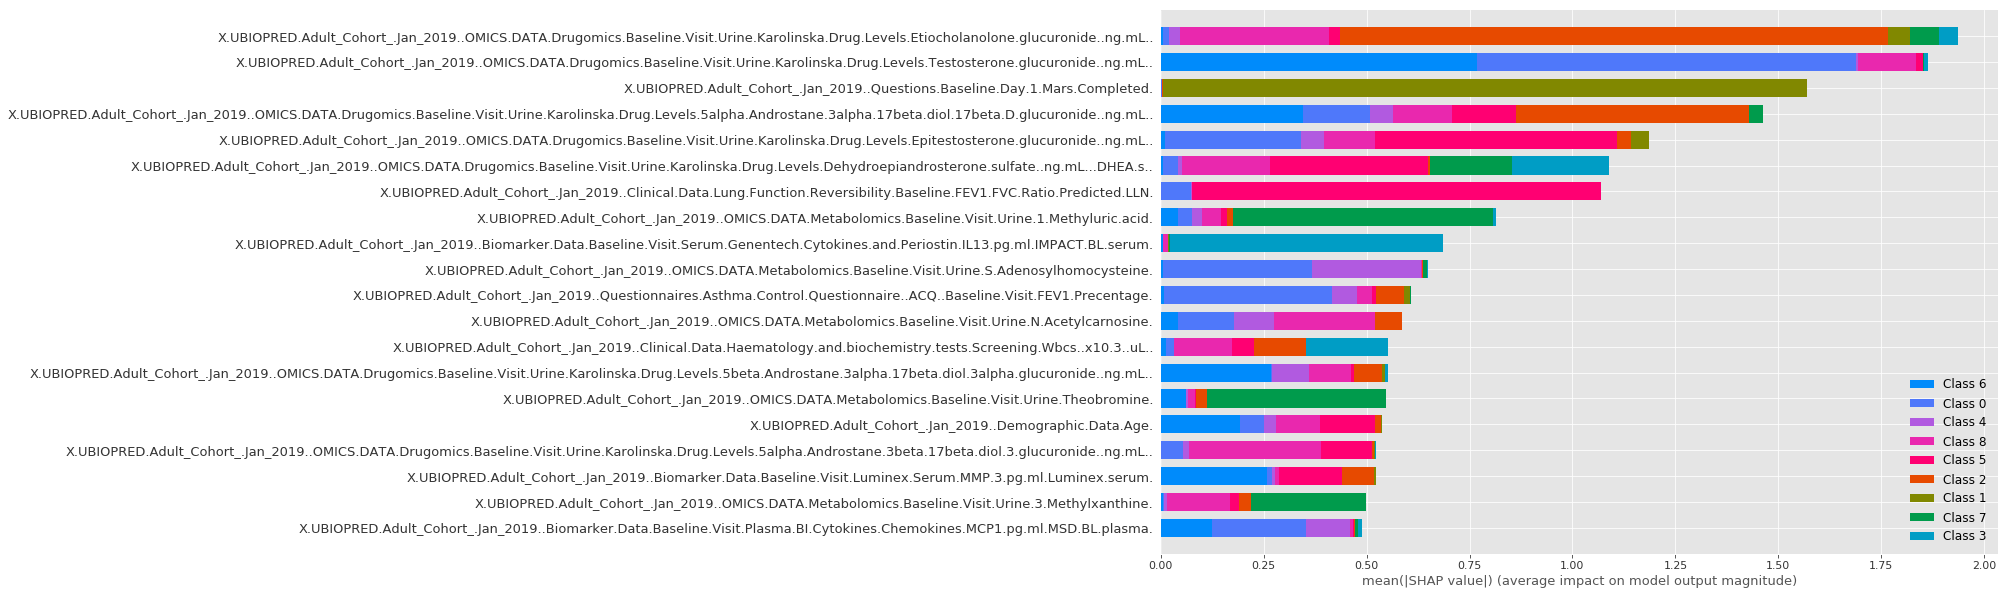

In [75]:
shap.summary_plot(shap_values_kp, cat_data, plot_type="bar", plot_size=(15, 10),show=False)
ax = plt.gca()
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/")
plt.savefig('shap_plot_08+corr.pdf',format='pdf', dpi=1000, bbox_inches='tight')

REDO IT FOR EACH CLUSTER

In [51]:
#Setting the objects to category 
cat_data = df_correlation.copy()
for i in cat_data.select_dtypes(include='object'):
    cat_data[i] = cat_data[i].astype('category')

In [52]:
cat_data.dtypes

Unnamed: 0                                                                                                                                                                   int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.                                                                      int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.                                                                     int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.                                                                    int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.                                                                    int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.s

In [76]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 411 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum. to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: category(206), int64(205)
memory usage: 1.1 MB


In [69]:
df_correlation['proto_lab'] = kproto_df.labels_

AttributeError: 'KPrototypes' object has no attribute 'labels_'

In [39]:
# clusters size
df_correlation['proto_lab'].value_counts(sort=False).plot(
    kind='barh',
    color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
    figsize=(5, 5)).invert_yaxis()
plt.xlabel('nb of patients', labelpad=14)
plt.ylabel('clusters')
plt.title('kproto clusters size', y=1.02)
#import os
#os.chdir("/rds/general/user/md2620/home/asthma/Malo/")
#plt.savefig('k_proto_cluster_size_08+.png')

KeyError: 'proto_lab'

In [109]:
df_correlation.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                           
4                                                334              

In [84]:
#Copy df to append clusters associated with each observations + to have variables as they were originally (not standardized, not encoded)
df_2 = df.copy()

In [101]:
df_2.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                         

In [104]:
df_2.set_index('X',inplace=True)

In [105]:
df_2.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
X                                                                                                                
A_348                                                 31                                                         
A_544                                                 34                                                         
A_018                                                 39                                                         
A_613                                                 62                                                         
A_390                                                 55                                                         

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
X                                                                                                                 
A_348                                                 48                                                          
A_544                                                 16                                                          
A_018                                                 30                                                          
A_613                                                 46                                                          
A_390                                                 14                                                          

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                               2691                                                           
A_544                                               3978                                                           
A_018                                               5106                                                           
A_613                                               5296                                                           
A_390                                               4746                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                              92306                                                           
A_544                                             119317                                                           
A_018                                             104613                                                           
A_613                                             144767                                                           
A_390                                             102499                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
X                                                                                                                       
A_348                                               3729                                                                
A_544                                               6518                                                                
A_018                                               5682                                                                
A_613                                               5468                                                                
A_390                                             

In [106]:
#Save the obtained clusters in a dictionary where keys are ID's and values are the cluster numbers. Append the clusters to the copy of the data.
clust_dict={}
clust=[]
for s, c in zip(ID, clusters):
    clust_dict[s]=c
    clust.append(c)
df_2['cluster']=clust

In [107]:
len(clust)

620

In [108]:
df_2.head(10)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
X                                                                                                                
A_348                                                 31                                                         
A_544                                                 34                                                         
A_018                                                 39                                                         
A_613                                                 62                                                         
A_390                                                 55                                                         
A_630                                                 38                                                         
A_311                                                 19                                                         
A_709                                                 20                                                         
A_183                                                 26                                                         
A_064                                                 62                                                         

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
X                                                                                                                 
A_348                                                 48                                                          
A_544                                                 16                                                          
A_018                                                 30                                                          
A_613                                                 46                                                          
A_390                                                 14                                                          
A_630                                                 34                                                          
A_311                                                 39                                                          
A_709                                                 25                                                          
A_183                                                 36                                                          
A_064                                                 24                                                          

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                               2691                                                           
A_544                                               3978                                                           
A_018                                               5106                                                           
A_613                                               5296                                                           
A_390                                               4746                                                           
A_630                                               5126                                                           
A_311                                               3293                                                           
A_709                                               6701                                                           
A_183                                               4082                                         

In [111]:
#Save dataset with observations appended to each cluster
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
df_2.to_csv('df_with_optimal_clusters_afterk_proto.csv')

In [112]:
#import dataframe to be appended with cluster that we obtained
df3=pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/df_needing_clusters_append.csv', low_memory=False)

In [113]:
df3.head(5)

Unnamed: 0      X  \
0           0  A_275   
1           1  A_255   
2           2  A_066   
3           3  A_576   
4           4  A_346   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                           15.40062                                                         
1                                           35.36904                                                         
2                                           64.54227                                                         
3                                           27.87068                                                         
4                                           54.33284                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           43.21374                                                          
1                                           41.32215                                                          
2                                           44.07050                                                          
3                                           53.26277                                                          
4                                          103.44686                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                         4595.44257                                                           
1                                         2953.13696                                                           
2                                         3791.92200                                                           
3                                          505.74000                                                           
4                                         5075.04724                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                        83675.19115                                                           
1                                        70777.99890                                                           
2                                       134240.48677                                                           
3                                        80697.36932                                                           
4                                       204658.75297                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                         5524.91473                                                                
1                                         4890.76760                                                                
2                                         6067.52221                                                                
3                                         4589.12850                                                                
4                                         6656.72262                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          172.20343                                                           
1                                          187.14959                                                           
2                                           82.77965                                                           
3                                

In [122]:
#Reset index in order to have X(Patient ID) as a column in df_2
df_2.reset_index(inplace=True)

In [123]:
df_2.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                         

In [124]:
#Observe if df_2 and df3 after appending match
df_2[['X','X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.','cluster']]

X  \
0    A_348   
1    A_544   
2    A_018   
3    A_613   
4    A_390   
5    A_630   
6    A_311   
7    A_709   
8    A_183   
9    A_064   
10   A_298   
11   A_570   
12   A_022   
13   A_589   
14   A_713   
15   A_380   
16   A_030   
17   A_499   
18   A_322   
19   A_541   
20   A_457   
21   A_692   
22   A_133   
23   A_596   
24   A_500   
25   A_377   
26   A_497   
27   A_476   
28   A_475   
29   A_720   
30   A_611   
31   A_232   
32   A_191   
33   A_196   
34   A_400   
35   A_711   
36   A_250   
37   A_167   
38   A_366   
39   A_301   
40   A_256   
41   A_432   
42   A_067   
43   A_598   
44   A_308   
45   A_625   
46   A_159   
47   A_336   
48   A_272   
49   A_528   
50   A_481   
51   A_708   
52   A_219   
53   A_332   
54   A_152   
55   A_583   
56   A_057   
57   A_662   
58   A_089   
59   A_591   
60   A_039   
61   A_143   
62   A_118   
63   A_247   
64   A_288   
65   A_524   
66   A_374   
67   A_340   
68   A_617   
69   A_115   
70   A_702   
71   A_650   
72   A_535   
73   A_560   
74   A_305   
75   A_633   
76   A_225   
77   A_216   
78   A_554   
79   A_245   
80   A_682   
81   A_471   
82   A_370   
83   A_300   
84   A_002   
85   A_458   
86   A_487   
87   A_488   
88   A_514   
89   A_716   
90   A_087   
91   A_519   
92   A_680   
93   A_323   
94   A_059   
95   A_138   
96   A_351   
97   A_653   
98   A_240   
99   A_098   
100  A_655   
101  A_160   
102  A_190   
103  A_276   
104  A_639   
105  A_172   
106  A_050   
107  A_635   
108  A_534   
109  A_666   
110  A_547   
111  A_450   
112  A_292   
113  A_433   
114  A_428   
115  A_419   
116  A_386   
117  A_217   
118  A_037   
119  A_110   
120  A_241   
121  A_003   
122  A_093   
123  A_477   
124  A_462   
125  A_461   
126  A_306   
127  A_056   
128  A_246   
129  A_715   
130  A_656   
131  A_397   
132  A_379   
133  A_618   
134  A_634   
135  A_561   
136  A_705   
137  A_391   
138  A_320   
139  A_641   
140  A_020   
141  A_258   
142  A_592   
143  A_065   
144  A_035   
145  A_689   
146  A_231   
147  A_695   
148  A_045   
149  A_005   
150  A_559   
151  A_378   
152  A_360   
153  A_619   
154  A_024   
155  A_577   
156  A_649   
157  A_494   
158  A_130   
159  A_355   
160  A_685   
161  A_032   
162  A_227   
163  A_493   
164  A_099   
165  A_564   
166  A_483   
167  A_671   
168  A_031   
169  A_446   
170  A_512   
171  A_148   
172  A_235   
173  A_278   
174  A_220   
175  A_079   
176  A_448   
177  A_128   
178  A_244   
179  A_626   
180  A_068   
181  A_330   
182  A_273   
183  A_415   
184  A_579   
185  A_017   
186  A_430   
187  A_033   
188  A_553   
189  A_427   
190  A_019   
191  A_531   
192  A_257   
193  A_145   
194  A_069   
195  A_557   
196  A_522   
197  A_319   
198  A_539   
199  A_038   
200  A_103   
201  A_507   
202  A_173   
203  A_407   
204  A_012   
205  A_601   
206  A_182   
207  A_383   
208  A_189   
209  A_523   
210  A_409   
211  A_053   
212  A_315   
213  A_392   
214  A_717   
215  A_678   
216  A_155   
217  A_505   
218  A_223   
219  A_313   
220  A_349   
221  A_515   
222  A_041   
223  A_084   
224  A_703   
225  A_291   
226  A_200   
227  A_357   
228  A_465   
229  A_423   
230  A_574   
231  A_248   
232  A_199   
233  A_359   
234  A_454   
235  A_623   
236  A_171   
237  A_431   
238  A_674   
239  A_060   
240  A_605   
241  A_467   
242  A_253   
243  A_530   
244  A_341   
245  A_677   
246  A_094   
247  A_294   
248  A_629   
249  A_283   
250  A_727   
251  A_211   
252  A_367   
253  A_282   
254  A_586   
255  A_381   
256  A_112   
257  A_376   
258  A_144   
259  A_170   
260  A_612   
261  A_142   
262  A_013   
263  A_077   
264  A_665   
265  A_389   
266  A_023   
267  A_026   
268  A_459   
269  A_146   
270  A_304   
271  A_413   
272  A_398   
273  A_314   
274  A_585   
275  A_062   
276  A_132   
277  A_051   
278  A_029   
279  A_555   
280  A_529   
281  A_188   
282  A_418   
283  A_406   
284  A_222   
285  

In [117]:
#append cluster member to df_needing_clusters_append dataframe
#We obtain final dataset to be used for describing clinical characteristics of each cluster
df3["cluster"] = df3.merge(df_2, on="X")["cluster"]

In [118]:
df3.head(5)

Unnamed: 0      X  \
0           0  A_275   
1           1  A_255   
2           2  A_066   
3           3  A_576   
4           4  A_346   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                           15.40062                                                         
1                                           35.36904                                                         
2                                           64.54227                                                         
3                                           27.87068                                                         
4                                           54.33284                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           43.21374                                                          
1                                           41.32215                                                          
2                                           44.07050                                                          
3                                           53.26277                                                          
4                                          103.44686                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                         4595.44257                                                           
1                                         2953.13696                                                           
2                                         3791.92200                                                           
3                                          505.74000                                                           
4                                         5075.04724                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                        83675.19115                                                           
1                                        70777.99890                                                           
2                                       134240.48677                                                           
3                                        80697.36932                                                           
4                                       204658.75297                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                         5524.91473                                                                
1                                         4890.76760                                                                
2                                         6067.52221                                                                
3                                         4589.12850                                                                
4                                         6656.72262                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          172.20343                                                           
1                                          187.14959                                                           
2                                           82.77965                                                           
3                                

In [126]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df3[['X','X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.','cluster']]

X  \
0    A_275   
1    A_255   
2    A_066   
3    A_576   
4    A_346   
5    A_069   
6    A_377   
7    A_149   
8    A_072   
9    A_664   
10   A_543   
11   A_406   
12   A_383   
13   A_382   
14   A_233   
15   A_550   
16   A_517   
17   A_509   
18   A_407   
19   A_575   
20   A_199   
21   A_023   
22   A_649   
23   A_403   
24   A_360   
25   A_115   
26   A_052   
27   A_618   
28   A_306   
29   A_287   
30   A_404   
31   A_180   
32   A_030   
33   A_577   
34   A_565   
35   A_497   
36   A_466   
37   A_342   
38   A_313   
39   A_214   
40   A_671   
41   A_467   
42   A_439   
43   A_430   
44   A_373   
45   A_246   
46   A_150   
47   A_110   
48   A_516   
49   A_450   
50   A_534   
51   A_523   
52   A_301   
53   A_151   
54   A_579   
55   A_578   
56   A_226   
57   A_178   
58   A_528   
59   A_263   
60   A_341   
61   A_605   
62   A_203   
63   A_642   
64   A_396   
65   A_362   
66   A_159   
67   A_040   
68   A_001   
69   A_597   
70   A_217   
71   A_076   
72   A_059   
73   A_531   
74   A_387   
75   A_087   
76   A_028   
77   A_645   
78   A_512   
79   A_379   
80   A_475   
81   A_436   
82   A_410   
83   A_114   
84   A_729   
85   A_662   
86   A_640   
87   A_376   
88   A_106   
89   A_470   
90   A_086   
91   A_224   
92   A_574   
93   A_644   
94   A_556   
95   A_454   
96   A_435   
97   A_539   
98   A_460   
99   A_371   
100  A_129   
101  A_698   
102  A_611   
103  A_388   
104  A_381   
105  A_311   
106  A_714   
107  A_526   
108  A_209   
109  A_162   
110  A_064   
111  A_643   
112  A_456   
113  A_048   
114  A_033   
115  A_482   
116  A_451   
117  A_340   
118  A_491   
119  A_440   
120  A_291   
121  A_111   
122  A_056   
123  A_624   
124  A_598   
125  A_593   
126  A_587   
127  A_524   
128  A_026   
129  A_710   
130  A_215   
131  A_635   
132  A_468   
133  A_358   
134  A_355   
135  A_236   
136  A_562   
137  A_481   
138  A_465   
139  A_336   
140  A_558   
141  A_547   
142  A_228   
143  A_630   
144  A_554   
145  A_498   
146  A_687   
147  A_510   
148  A_463   
149  A_222   
150  A_105   
151  A_094   
152  A_092   
153  A_077   
154  A_047   
155  A_685   
156  A_626   
157  A_208   
158  A_709   
159  A_653   
160  A_018   
161  A_688   
162  A_418   
163  A_172   
164  A_153   
165  A_037   
166  A_667   
167  A_411   
168  A_171   
169  A_160   
170  A_592   
171  A_478   
172  A_397   
173  A_392   
174  A_295   
175  A_206   
176  A_145   
177  A_098   
178  A_091   
179  A_051   
180  A_022   
181  A_021   
182  A_020   
183  A_533   
184  A_453   
185  A_354   
186  A_156   
187  A_097   
188  A_078   
189  A_651   
190  A_122   
191  A_708   
192  A_684   
193  A_175   
194  A_615   
195  A_589   
196  A_542   
197  A_283   
198  A_244   
199  A_189   
200  A_058   
201  A_002   
202  A_361   
203  A_139   
204  A_009   
205  A_632   
206  A_522   
207  A_230   
208  A_223   
209  A_143   
210  A_596   
211  A_519   
212  A_469   
213  A_338   
214  A_330   
215  A_323   
216  A_317   
217  A_288   
218  A_205   
219  A_142   
220  A_241   
221  A_148   
222  A_123   
223  A_706   
224  A_646   
225  A_294   
226  A_697   
227  A_692   
228  A_627   
229  A_607   
230  A_686   
231  A_674   
232  A_658   
233  A_552   
234  A_444   
235  A_398   
236  A_368   
237  A_327   
238  A_322   
239  A_257   
240  A_119   
241  A_617   
242  A_315   
243  A_659   
244  A_590   
245  A_154   
246  A_104   
247  A_265   
248  A_210   
249  A_074   
250  A_010   
251  A_713   
252  A_025   
253  A_677   
254  A_563   
255  A_561   
256  A_493   
257  A_432   
258  A_409   
259  A_380   
260  A_488   
261  A_462   
262  A_415   
263  A_285   
264  A_232   
265  A_198   
266  A_147   
267  A_107   
268  A_093   
269  A_084   
270  A_196   
271  A_027   
272  A_012   
273  A_573   
274  A_402   
275  A_135   
276  A_108   
277  A_095   
278  A_678   
279  A_529   
280  A_239   
281  A_080   
282  A_245   
283  A_212   
284  A_182   
285  

In [127]:
#Save dataset with observations appended to each cluster
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
df3.to_csv('df_for_cluster_char.csv')